In [1]:
import xgboost as xgb
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
import tensorflow as tf 

In [2]:
data = load_boston()  # 波士顿房价数据集

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X = data.data
Y = data.target

In [5]:
print(X.shape)
X

(506, 13)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
print(Y.shape)
Y

(506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,Y,test_size=0.3,random_state = 30)

In [8]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)
Xtrain

(354, 13) (152, 13) (354,) (152,)


array([[3.22640e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.78250e+02, 1.69000e+01],
       [6.65492e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.39900e+01],
       [2.48017e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.97700e+01],
       ...,
       [9.33889e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        6.07200e+01, 2.40800e+01],
       [7.02259e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.19980e+02, 1.57000e+01],
       [8.26500e-02, 0.00000e+00, 1.39200e+01, ..., 1.60000e+01,
        3.96900e+02, 8.58000e+00]])

In [9]:
reg = XGBR(n_estimators = 100).fit(Xtrain,Ytrain) # 训练

In [10]:
Ytest

array([19.6, 10.5, 19.3, 29.9, 15.2, 14.5, 20.1, 46. , 11.7, 27.5, 24.1,
       28.2, 15.6, 24. , 13.3, 26.2, 13.4, 36.2, 16.6, 22.6, 22. , 17.2,
       25.1, 18.5, 13.1, 19.1, 19.8, 13.8, 13.5, 17.2, 23.2, 19.2, 31.5,
       26.4, 20.4, 20.6, 16.3, 20. , 20.4, 23. , 20.8, 18.8, 50. , 22.6,
       22.6, 21.1, 17.8, 18.7, 16. , 18.4, 15.6, 20. , 22.6, 24.1, 32.5,
       21.9, 50. , 23.3, 21.9, 33.4, 19.1, 13.3, 28.4, 21.5, 12.1,  6.3,
       13. , 25. , 43.8, 36.4, 14.3, 29.8, 21.7, 27.1, 24.3, 22.6, 13.8,
       23.8, 22.2, 26.7, 20.8, 22.7, 22.9, 22.4, 25.3, 33.2, 42.3, 30.1,
       21.7, 15.2, 26.6, 24. , 18. , 31.2, 14.6, 17.6, 14.4, 33.4, 18.5,
       26.6, 24.4, 18.4, 19.6,  9.6, 11. , 24.7, 41.3, 14.8, 22.2, 31.1,
       23.4, 25. , 21.4, 28.1, 15.7, 18.9, 18.8, 34.6, 16.6, 14.9, 16.1,
       24.2, 17. ,  7.2, 14.3, 17.5, 31.5, 13.4, 15. , 13.8, 50. , 16.8,
        8.7, 23.7, 15.2, 19.7, 20.3,  8.1, 50. , 13.3, 10.2, 21.2, 16.7,
       29.8,  9.7, 13.2, 23.3, 30.3, 39.8, 24.4, 28

In [11]:
reg.predict(Xtest) # 用来预测的方法

array([18.114859 , 10.442559 , 21.02224  , 28.862339 , 16.52736  ,
       17.968763 , 19.819645 , 43.701523 , 14.032652 , 24.62436  ,
       24.004845 , 29.650408 , 17.550238 , 26.47705  , 14.205645 ,
       26.904558 , 10.782549 , 26.095654 , 16.817335 , 23.247208 ,
       21.051823 , 16.98095  , 27.930046 , 17.888544 ,  9.830332 ,
       16.743425 , 18.23409  , 15.275767 , 13.725085 , 15.913806 ,
       13.615839 , 20.536736 , 33.894096 , 22.809525 , 20.165815 ,
       20.833145 , 14.2584305, 21.13964  , 18.262774 , 19.583447 ,
       18.229153 , 19.973173 , 48.636227 , 20.75955  , 22.074205 ,
       19.447834 , 22.306414 , 20.95655  , 19.98362  , 16.339844 ,
       16.169037 , 17.539627 , 21.11483  , 25.587633 , 28.969501 ,
       21.300285 , 47.446472 , 27.20394  , 17.411585 , 34.12002  ,
       20.230446 ,  9.966375 , 28.305302 , 20.75586  ,  9.99872  ,
        9.383313 , 15.440365 , 23.827963 , 39.658592 , 35.13212  ,
       13.544371 , 31.075941 , 21.801601 , 24.772541 , 25.0260

In [12]:
reg.score(Xtest,Ytest) # 评估分数：决策系数R^2，最好评分为1.0

0.9055081519077226

In [13]:
MSE(Ytest,reg.predict(Xtest)) # 均方根误差，0为最好结果

7.019632815266426

In [14]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
# mean_squared_error(y_true, y_pred)
# 0.375
d = [(y_pred[i] - y_true[i])**2 for i in range(4)]
print(d)
sumd = sum(d)
print(sumd)
print(sumd/4) # 均方根误差

[0.25, 0.25, 0, 1]
1.5
0.375


In [15]:
reg.feature_importances_ # 数模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择

array([0.01508165, 0.00054066, 0.00899997, 0.01055708, 0.08850724,
       0.38012958, 0.00608881, 0.06192165, 0.00743645, 0.0382553 ,
       0.05768541, 0.01243234, 0.3123638 ], dtype=float32)

In [16]:
# 交叉验证针对回归模型是用R^2进行打分，针对分类的模型的打分指标就是正确率
reg = XGBR(n_estimators = 100) # 交叉验证中导入没有进过训练的模型
CVS(reg,Xtrain,Ytrain,cv=5) # cv = 5 就会将模型平均分成5份，一份用来当做验证数据，4份用来当做训练数据，互相交叉验证，看那4份训练的最好选那个

array([0.77141961, 0.85896651, 0.86494742, 0.8362383 , 0.90049917])

In [17]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.846414203100269

In [18]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean() # 指定使用交叉验证的方式，这里不是R^2指标，而是负的MSE值

-13.513045662193145

In [19]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) # 列出所有可以使用的评估指标

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [20]:
# 使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean() # 使用随机森林的效果R^2

0.8414403111729761

In [21]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean() 

-14.363461756096578

In [22]:
# 线性回归
lr = LinearR()
print(CVS(lr,Xtrain,Ytrain,cv=5).mean())
print(CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean() )

0.7195950910222106
-24.284684914064982


In [23]:
# 使用深度学习模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,input_shape=(13,),activation='relu'),
    tf.keras.layers.Dense(64,input_shape=(13,),activation='relu'),
    tf.keras.layers.Dense(32,input_shape=(13,),activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss = 'mse',optimizer = tf.keras.optimizers.Adam(learning_rate=0.005))
model.summary()

model.fit(Xtrain,Ytrain,epochs=1000,validation_data=[Xtest,Ytest])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________
Train on 354 samples, validate on 152 samples
Epoch 1/1000
354/354 [==============================] - 0s 1ms/sample - loss: 1116.1376 - val_loss: 122.8704
Epoch 2/1000
354/354 [==============================] - 0s 52us/sample - loss: 131.6116 - val_los

354/354 [==============================] - 0s 54us/sample - loss: 20.2123 - val_loss: 15.6437
Epoch 144/1000
354/354 [==============================] - 0s 52us/sample - loss: 16.7302 - val_loss: 23.2238
Epoch 145/1000
354/354 [==============================] - 0s 51us/sample - loss: 22.2415 - val_loss: 20.4054
Epoch 146/1000
354/354 [==============================] - 0s 53us/sample - loss: 18.7074 - val_loss: 23.2012
Epoch 147/1000
354/354 [==============================] - 0s 51us/sample - loss: 19.7660 - val_loss: 18.9930
Epoch 148/1000
354/354 [==============================] - 0s 52us/sample - loss: 24.4732 - val_loss: 22.3348
Epoch 149/1000
354/354 [==============================] - 0s 54us/sample - loss: 22.4570 - val_loss: 25.8944
Epoch 150/1000
354/354 [==============================] - 0s 54us/sample - loss: 24.2708 - val_loss: 22.6280
Epoch 151/1000
354/354 [==============================] - 0s 52us/sample - loss: 19.2635 - val_loss: 21.5248
Epoch 152/1000
354/354 [==========

354/354 [==============================] - 0s 52us/sample - loss: 15.2167 - val_loss: 14.2347
Epoch 294/1000
354/354 [==============================] - 0s 52us/sample - loss: 15.8468 - val_loss: 15.9740
Epoch 295/1000
354/354 [==============================] - 0s 53us/sample - loss: 15.7942 - val_loss: 16.0606
Epoch 296/1000
354/354 [==============================] - 0s 52us/sample - loss: 15.2875 - val_loss: 17.6088
Epoch 297/1000
354/354 [==============================] - 0s 52us/sample - loss: 17.9740 - val_loss: 14.8267
Epoch 298/1000
354/354 [==============================] - 0s 52us/sample - loss: 14.4411 - val_loss: 14.0515
Epoch 299/1000
354/354 [==============================] - 0s 52us/sample - loss: 13.9882 - val_loss: 14.3667
Epoch 300/1000
354/354 [==============================] - 0s 52us/sample - loss: 13.6921 - val_loss: 14.2003
Epoch 301/1000
354/354 [==============================] - 0s 52us/sample - loss: 14.0309 - val_loss: 13.7827
Epoch 302/1000
354/354 [==========

354/354 [==============================] - 0s 50us/sample - loss: 12.1927 - val_loss: 14.8404
Epoch 444/1000
354/354 [==============================] - 0s 52us/sample - loss: 12.2509 - val_loss: 16.4536
Epoch 445/1000
354/354 [==============================] - 0s 51us/sample - loss: 12.8298 - val_loss: 13.3426
Epoch 446/1000
354/354 [==============================] - 0s 50us/sample - loss: 13.8366 - val_loss: 12.9676
Epoch 447/1000
354/354 [==============================] - 0s 51us/sample - loss: 11.8950 - val_loss: 17.3076
Epoch 448/1000
354/354 [==============================] - 0s 52us/sample - loss: 14.5661 - val_loss: 14.8646
Epoch 449/1000
354/354 [==============================] - 0s 50us/sample - loss: 14.5820 - val_loss: 22.5615
Epoch 450/1000
354/354 [==============================] - 0s 50us/sample - loss: 14.8232 - val_loss: 15.5911
Epoch 451/1000
354/354 [==============================] - 0s 50us/sample - loss: 13.6231 - val_loss: 16.9957
Epoch 452/1000
354/354 [==========

354/354 [==============================] - 0s 51us/sample - loss: 34.8854 - val_loss: 23.6866
Epoch 594/1000
354/354 [==============================] - 0s 51us/sample - loss: 22.1336 - val_loss: 19.4984
Epoch 595/1000
354/354 [==============================] - 0s 51us/sample - loss: 18.6942 - val_loss: 13.8343
Epoch 596/1000
354/354 [==============================] - 0s 51us/sample - loss: 16.5398 - val_loss: 14.3441
Epoch 597/1000
354/354 [==============================] - 0s 52us/sample - loss: 15.1890 - val_loss: 15.0731
Epoch 598/1000
354/354 [==============================] - 0s 50us/sample - loss: 14.4017 - val_loss: 13.6861
Epoch 599/1000
354/354 [==============================] - 0s 50us/sample - loss: 13.7246 - val_loss: 14.9249
Epoch 600/1000
354/354 [==============================] - 0s 51us/sample - loss: 15.1714 - val_loss: 13.7946
Epoch 601/1000
354/354 [==============================] - 0s 51us/sample - loss: 13.1440 - val_loss: 13.2564
Epoch 602/1000
354/354 [==========

354/354 [==============================] - 0s 51us/sample - loss: 12.0544 - val_loss: 16.3962
Epoch 744/1000
354/354 [==============================] - 0s 51us/sample - loss: 13.8863 - val_loss: 16.3345
Epoch 745/1000
354/354 [==============================] - 0s 51us/sample - loss: 10.7379 - val_loss: 15.5767
Epoch 746/1000
354/354 [==============================] - 0s 51us/sample - loss: 10.7206 - val_loss: 16.5459
Epoch 747/1000
354/354 [==============================] - 0s 51us/sample - loss: 14.4354 - val_loss: 15.3950
Epoch 748/1000
354/354 [==============================] - 0s 53us/sample - loss: 12.5673 - val_loss: 17.8612
Epoch 749/1000
354/354 [==============================] - 0s 51us/sample - loss: 20.6802 - val_loss: 24.0668
Epoch 750/1000
354/354 [==============================] - 0s 52us/sample - loss: 22.2338 - val_loss: 15.6890
Epoch 751/1000
354/354 [==============================] - 0s 51us/sample - loss: 15.4051 - val_loss: 16.8582
Epoch 752/1000
354/354 [==========

354/354 [==============================] - 0s 53us/sample - loss: 9.4716 - val_loss: 14.1313
Epoch 894/1000
354/354 [==============================] - 0s 51us/sample - loss: 8.8651 - val_loss: 14.2905
Epoch 895/1000
354/354 [==============================] - 0s 53us/sample - loss: 9.5912 - val_loss: 13.7583
Epoch 896/1000
354/354 [==============================] - 0s 52us/sample - loss: 9.0603 - val_loss: 15.7253
Epoch 897/1000
354/354 [==============================] - 0s 53us/sample - loss: 9.7351 - val_loss: 13.3909
Epoch 898/1000
354/354 [==============================] - 0s 52us/sample - loss: 10.3884 - val_loss: 12.7411
Epoch 899/1000
354/354 [==============================] - 0s 52us/sample - loss: 15.4103 - val_loss: 16.4872
Epoch 900/1000
354/354 [==============================] - 0s 52us/sample - loss: 16.0058 - val_loss: 13.7100
Epoch 901/1000
354/354 [==============================] - 0s 52us/sample - loss: 10.9727 - val_loss: 13.3657
Epoch 902/1000
354/354 [===============

In [24]:
print(Ytest)
print(model.predict(Xtest))

[19.6 10.5 19.3 29.9 15.2 14.5 20.1 46.  11.7 27.5 24.1 28.2 15.6 24.
 13.3 26.2 13.4 36.2 16.6 22.6 22.  17.2 25.1 18.5 13.1 19.1 19.8 13.8
 13.5 17.2 23.2 19.2 31.5 26.4 20.4 20.6 16.3 20.  20.4 23.  20.8 18.8
 50.  22.6 22.6 21.1 17.8 18.7 16.  18.4 15.6 20.  22.6 24.1 32.5 21.9
 50.  23.3 21.9 33.4 19.1 13.3 28.4 21.5 12.1  6.3 13.  25.  43.8 36.4
 14.3 29.8 21.7 27.1 24.3 22.6 13.8 23.8 22.2 26.7 20.8 22.7 22.9 22.4
 25.3 33.2 42.3 30.1 21.7 15.2 26.6 24.  18.  31.2 14.6 17.6 14.4 33.4
 18.5 26.6 24.4 18.4 19.6  9.6 11.  24.7 41.3 14.8 22.2 31.1 23.4 25.
 21.4 28.1 15.7 18.9 18.8 34.6 16.6 14.9 16.1 24.2 17.   7.2 14.3 17.5
 31.5 13.4 15.  13.8 50.  16.8  8.7 23.7 15.2 19.7 20.3  8.1 50.  13.3
 10.2 21.2 16.7 29.8  9.7 13.2 23.3 30.3 39.8 24.4 28.5 21.7]
[[16.952806 ]
 [ 7.6211586]
 [18.077293 ]
 [25.89524  ]
 [16.01419  ]
 [16.958874 ]
 [17.681934 ]
 [45.00005  ]
 [12.247696 ]
 [19.926388 ]
 [20.192646 ]
 [33.264828 ]
 [12.767428 ]
 [27.337418 ]
 [16.901707 ]
 [23.903423 ]
 [11.7

In [25]:
# 如果开启参数silent:在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来讲课模型的训练进度
reg = XGBR(n_estimators = 10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-15.045388581535457

In [26]:
def plot_learning_curve(estimator,title,X,y,
                        ax = None, # 选择子图
                        ylim = None, # 设置纵坐标的取值范围
                        cv = None, # 交叉验证
                        n_jobs = None, # 设定所要使用的线程
                       ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y,
                                                            shuffle = True,
                                                            cv = cv,
#                                                             random_state = 420,
                                                            n_jobs = n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() # 绘制网格，不是必须
    ax.plot(train_sizes,np.mean(train_scores,axis=1), 'o-',
            color = 'r', label = "Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis = 1), 'o-',
            color = "g", label = "Test score")
    ax.legend(loc = "best")
    return ax

In [27]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 20) # 交叉验证模式

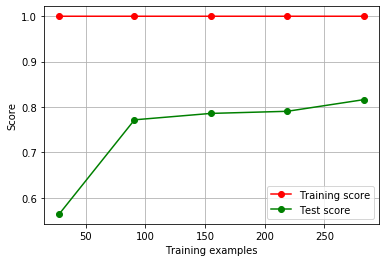

In [28]:
plot_learning_curve(XGBR(n_estimators = 100, random_state = 200),
                    "XGB", Xtrain, Ytrain, ax = None, cv = cv)
plt.show()
# 验证集效果很高，测试集效果很差，模型过拟合

60 0.8182988836223659


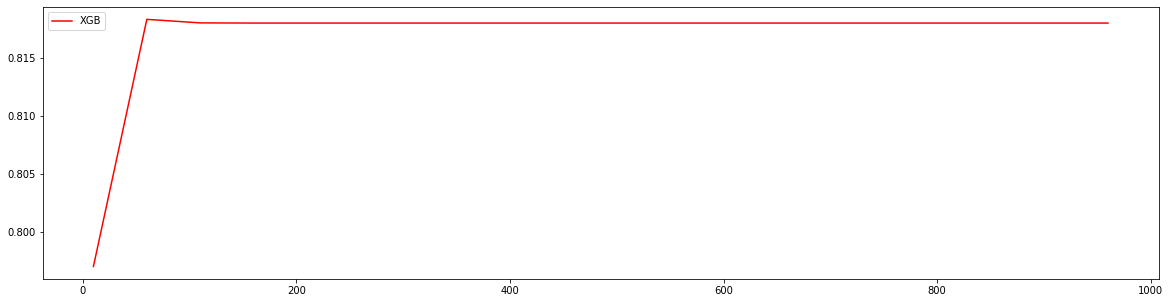

In [29]:
# 调参修正模型，解决模型过拟合的问题
# 首先对n_estimators进行调整，观察其对模型的影响
axisx = range(10,1010,50) # 以50为间隔，去多个estimators的参数
rs = [] # R^2的值，只能反映偏差问题
for i in axisx:
    reg = XGBR(n_estimators = i,random_state = 420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv = cv).mean())
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

60 0.8182988836223659
10 0.0020499912416115386
60 0.8182988836223659 0.0030273091231583183


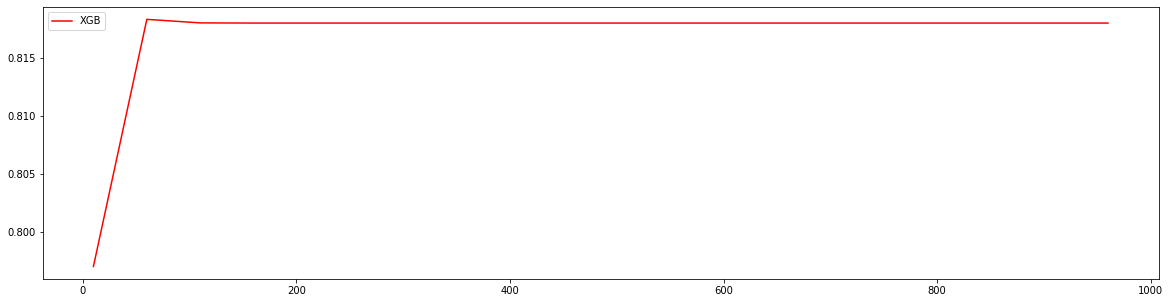

In [30]:
# 监听方差和泛华误差
axisx = range(10,1010,50) # 以50为间隔，去多个estimators的参数
rs = [] # R^2的值，只能反映偏差问题
var = [] # 添加方差结果
ge = [] # 添加泛华误差结果
for i in axisx:
    reg = XGBR(n_estimators = i,random_state = 420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv = cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛华误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
# 打印R2最高所对应的参数取值，并答应这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
# 打印方差最低是的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],min(var))
# 打印泛华误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛华误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))])
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

60 0.8182988836223659
50 0.0030177461190335994
50 0.8182781580160379 0.0030177461190335994


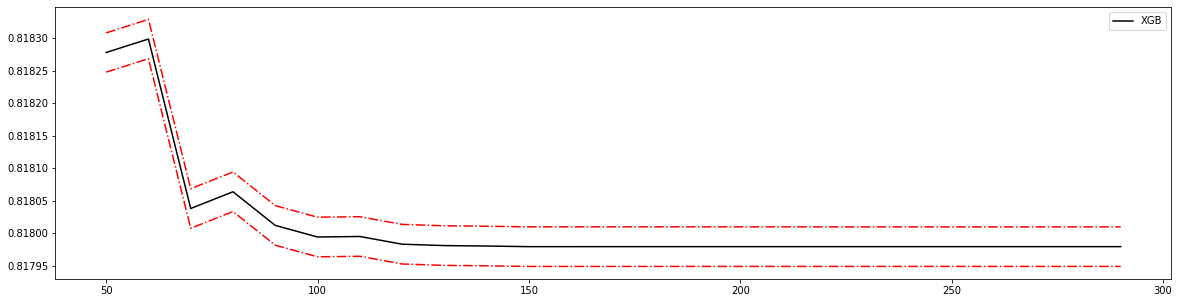

In [31]:
# 缩小取值范围
axisx = range(50,300,10) 
rs = [] # R^2的值，只能反映偏差问题
var = [] # 添加方差结果
ge = [] # 添加泛华误差结果
for i in axisx:
    reg = XGBR(n_estimators = i,random_state = 420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv = cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛华误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
# 打印R2最高所对应的参数取值，并答应这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
# 打印方差最低是的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],min(var))
# 打印泛华误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛华误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))])

# 我们绘制一下R2加减0.01倍方差的曲线
rs = np.array(rs)
var = np.array(var) * 0.01

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()

In [32]:
# 验证一下，调整n_estimators的值的效果
time0 = time()
print(XGBR(n_estimators = 100,random_state = 420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.9055081519077226
0.02758169174194336


In [33]:
# 验证一下，调整n_estimators的值的效果
time0 = time()
print(XGBR(n_estimators = 660,random_state = 420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.905484466415894
0.06654214859008789


In [34]:
# 验证一下，调整n_estimators的值的效果
time0 = time()
print(XGBR(n_estimators = 60,random_state = 420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.9053618924540712
0.01622605323791504


In [35]:
# 验证一下，调整n_estimators的值的效果
time0 = time()
print(XGBR(n_estimators = 50,random_state = 420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.9047464048000552
0.013556241989135742


# subsample 参数设置取样比例，在数据量大的时候解决过拟合的一个方法

In [36]:
axisx = np.linspace(0,1,20)
axisx

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

0.7894736842105263 0.8496867004325779


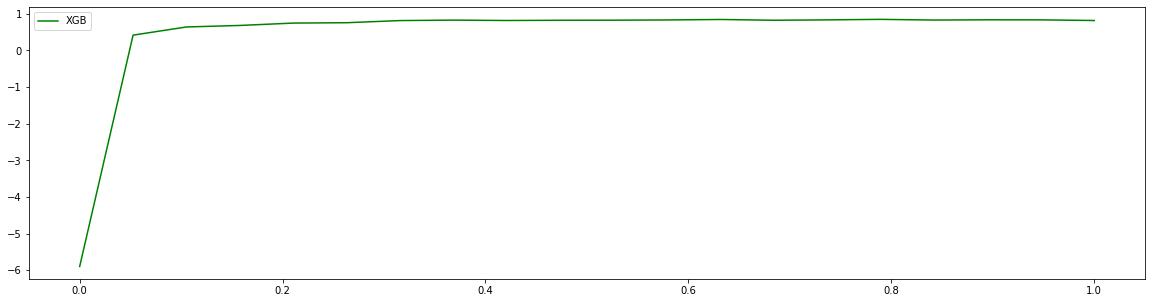

In [37]:
axisx = np.linspace(0,1,20) # 在0-1之间均匀的取20个数据
rs = [] # R^2的值，只能反映偏差问题
for i in axisx:
    reg = XGBR(n_estimators = 180,subsample = i,random_state = 420) # 当尝试不同的取样比例时，去检验模型的效果
    cvresult = CVS(reg,Xtrain,Ytrain,cv = cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
# 打印R2最高所对应的参数取值，并答应这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.65 0.8571804842326849
0.7999999999999999 0.0009961366389279994
0.65 0.8571804842326849 0.0013122538630055548 0.021709667947015922


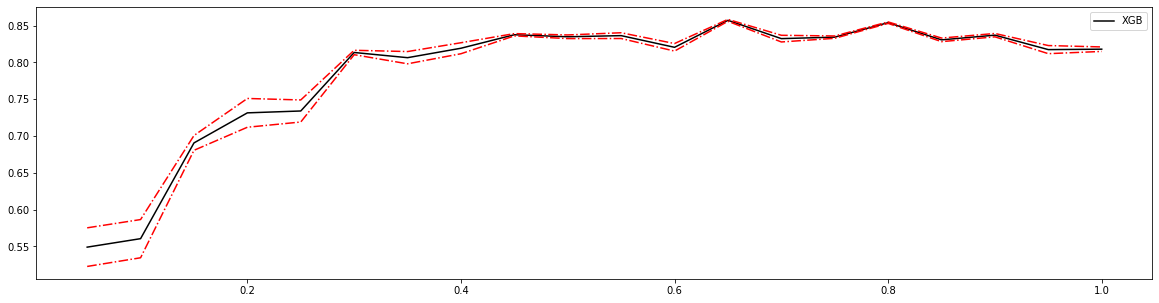

In [38]:
# 缩小subsample的取值范围，并且打印方差和泛化误差的最优取值
axisx = np.linspace(0.05,1,20) # 在0-1之间均匀的取20个数据
rs = [] # R^2的值，只能反映偏差问题
var = [] # 添加方差结果
ge = [] # 添加泛华误差结果
for i in axisx:
    reg = XGBR(n_estimators = 180,subsample = i,random_state = 420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv = cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛华误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
# 打印R2最高所对应的参数取值，并答应这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
# 打印方差最低是的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],min(var))
# 打印泛华误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛华误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

# 我们绘制一下R2加减0.01倍方差的曲线
rs = np.array(rs)
var = np.array(var) 

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()

0.65 0.8571804842326849
0.78125 0.0010736953340993532
0.65 0.8571804842326849 0.0013122538630055548 0.021709667947015922


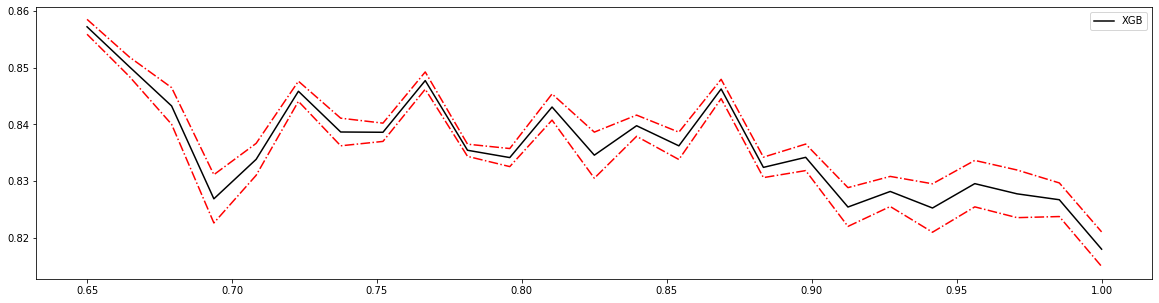

In [39]:
# 继续缩小范围到0.65-1
axisx = np.linspace(0.65,1,25) # 在0-1之间均匀的取20个数据
rs = [] # R^2的值，只能反映偏差问题
var = [] # 添加方差结果
ge = [] # 添加泛华误差结果
for i in axisx:
    reg = XGBR(n_estimators = 180,subsample = i,random_state = 420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv = cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛华误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
# 打印R2最高所对应的参数取值，并答应这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs)) # 得分最高的时候，n_estimators的取值
# 打印方差最低是的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],min(var))
# 打印泛华误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛华误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

# 我们绘制一下R2加减0.01倍方差的曲线
rs = np.array(rs)
var = np.array(var) 

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()

In [40]:
# 选取方差和泛化误差较小的subsample来进行验证模型效果
reg = XGBR(n_estimators = 180,subsample = 0.78125,random_state = 420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.8886182690022733

# 迭代决策树，重要参数ets:类似于反向传播时梯度下降的learning_rate，取值[0,1]

In [41]:
# 首先定义一个评分函数
def regassess(reg,Xtrain,Ytrain,cv,scoring=['r2'],show=True):
    score = []
    for i in range(len(scoring)):
        score_i = CVS(reg,
            Xtrain,Ytrain,
            cv = cv,
            scoring = scoring[i]).mean()
        if show:
            print("{}:{:.2f}".format(scoring[i],
                                     score_i,
                                    )
                 )
        score.append(score_i)
    return score

In [42]:
reg = XGBR(n_estimators=180,random_state=420)

In [43]:
regassess(reg,Xtrain,Ytrain,cv,scoring=['r2','neg_mean_squared_error'])

r2:0.82
neg_mean_squared_error:-15.08


[0.8179793461578793, -15.079114830493642]

In [44]:
# 尝试不同的learning_rate
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0 = time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring=['r2','neg_mean_squared_error'])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print()

learning_rate = 0
r2:-5.90
neg_mean_squared_error:-583.44
00:00:287148

learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-14.49
00:00:388277

learning_rate = 0.5
r2:0.78
neg_mean_squared_error:-18.51
00:00:231960

learning_rate = 1
r2:0.73
neg_mean_squared_error:-22.01
00:00:167698

